# Visualization of zillow real estate data
Data URL: www.zillow.com/research/data/

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import os

# Define some help functions

In [13]:
def showDataInfo(data):
    print('Data dimension --- ',data.shape)
    print(data.dtypes)
    print(data.head())

def calcTicks(size, bin=10):
    tickEnd = size-1
    tickBegin = tickEnd % 10
    return np.linspace(tickBegin, tickEnd, bin+1)

Plotting setup

In [14]:
plt.rcParams['figure.figsize'] = [10.0, 8.0]
saveDPI = 200

# median home price and turn over rate
Get median home price and turn over rate for all zip from Apr. 1996
Select data for 'Orinda' and 'San Jose'
Print median home price and turn over rate in two subplots of the same figure.

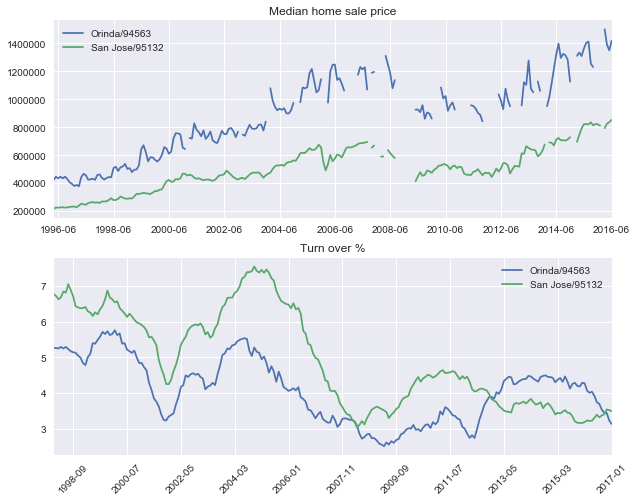

In [11]:
# home median price info for all zip from Apr. 1996
mp = pd.read_csv('Zip_MedianSoldPrice_AllHomes.csv')
#danville_p = mp[mp['RegionName']==94506]
orinda_p = mp[mp['RegionName']==94563]
sanjose_p = mp[mp['RegionName']==95132]

orinda_p = orinda_p.iloc[:,7:]
sanjose_p = sanjose_p.iloc[:,7:]
cities = ['Orinda/94563','San Jose/95132']
medianPrice = pd.concat([orinda_p, sanjose_p],axis=0).T
medianPrice.columns = cities

fig, axes = plt.subplots(2,1)
dataSize = medianPrice.shape[0]
medianPrice.plot(title='Median home sale price',xticks=calcTicks(dataSize),ax=axes[0])
plt.xticks(rotation = 45)

# Turnover rate
to = pd.read_csv('Zip_Turnover_AllHomes.csv')
orinda_to = to[to['RegionName']==94563]
sanjose_to = to[to['RegionName']==95132]
orinda_to = orinda_to.iloc[:,7:]
sanjose_to = sanjose_to.iloc[:,7:]
turnover = pd.concat([orinda_to, sanjose_to],axis=0).T
turnover.columns = cities

dataSize = turnover.shape[0]
turnover.plot(title='Turn over %',xticks=calcTicks(dataSize),ax=axes[1])
plt.xticks(rotation = 45)
plt.show()

# Price per square foot

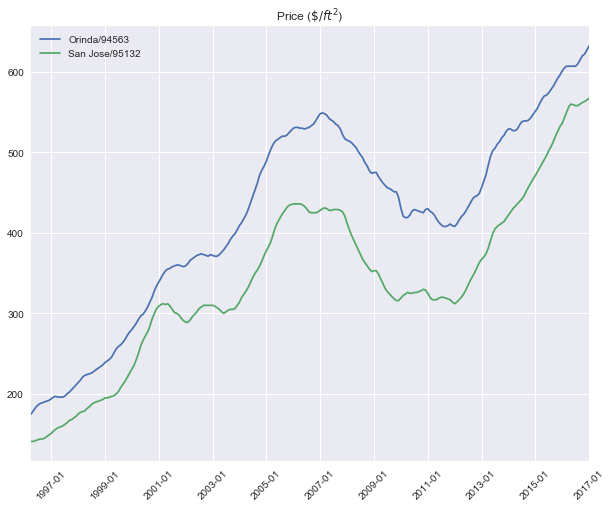

In [15]:
# Price per square foot
ppsf = pd.read_csv('Zip_MedianValuePerSqft_AllHomes.csv')
orinda_psf = ppsf[ppsf['RegionName']==94563]
sanjose_psf = ppsf[ppsf['RegionName']==95132]
orinda_psf = orinda_psf.iloc[:,7:]
sanjose_psf = sanjose_psf.iloc[:,7:]
sfPrice = pd.concat([orinda_psf, sanjose_psf],axis=0).T
sfPrice.columns = cities

dataSize = sfPrice.shape[0]
sfPrice.plot(title='Price ($\$/ft^2$)',xticks=calcTicks(dataSize))
plt.xticks(rotation = 45)
plt.show()

# Number of inventory homes

C:\Users\li\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


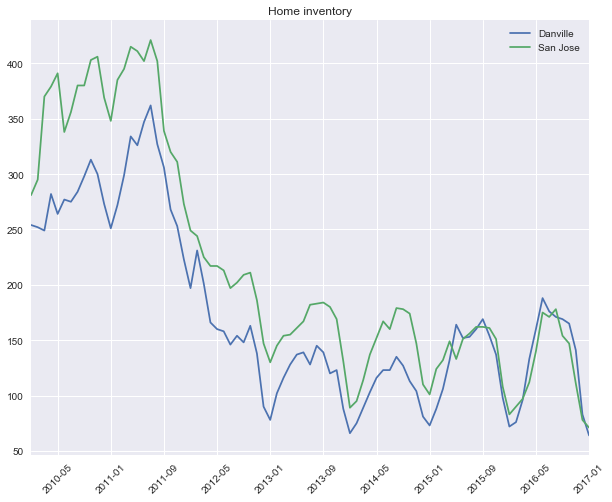

In [16]:
# Inventory
inv = pd.read_csv('InventoryMeasure_Zip_Public.csv')
danville_inv = inv[inv['City']=='Danville']
danville_inv = danville_inv[inv['StateFullName']=='California']
sanjose_inv = inv[inv['City']=='San Jose']
danville_inv = danville_inv.iloc[:,7:]
sanjose_inv = sanjose_inv.iloc[:,7:]

danville_inv = danville_inv.sum()
sanjose_inv = sanjose_inv.sum()
inventory = pd.concat([danville_inv, sanjose_inv],axis=1)
inventory.columns =  ['Danville', 'San Jose']

dataSize = inventory.shape[0]
inventory.plot(title='Home inventory',xticks=calcTicks(dataSize))
plt.xticks(rotation = 45)
plt.show()

# Number of homes sold

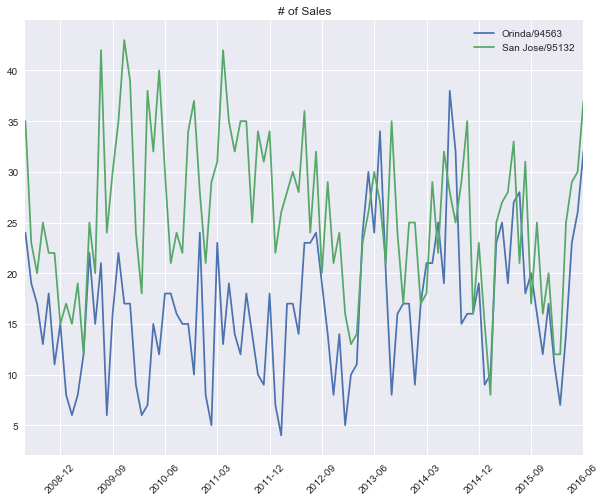

In [17]:
# Number of home sales
sale = pd.read_csv('Sales_Zip.csv')
orinda_sales = sale[sale['RegionName']==94563]
sanjose_sales = sale[sale['RegionName']==95132]
orinda_sales = orinda_sales.iloc[:,2:]
sanjose_sales = sanjose_sales.iloc[:,2:]
nSales = pd.concat([orinda_sales, sanjose_sales],axis=0).T
nSales.columns = cities

dataSize = nSales.shape[0]
nSales.plot(title='# of Sales',xticks=calcTicks(dataSize))
plt.xticks(rotation = 45)
plt.show()